<a href="https://colab.research.google.com/github/nereosky/DeepL-YuGiOh/blob/main/Yu_Gi_Oh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Deep learning YuGiOh


## Environnement matériel et logiciel

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip gdrive/My\ Drive/Kaggle/YuGiOh.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: original/pictures/19957  
  inflating: original/pictures/19958  
  inflating: original/pictures/19959  
  inflating: original/pictures/19960  
  inflating: original/pictures/19961  
  inflating: original/pictures/19962  
  inflating: original/pictures/19963  
  inflating: original/pictures/19964  
  inflating: original/pictures/19965  
  inflating: original/pictures/19966  
  inflating: original/pictures/19967  
  inflating: original/pictures/19968  
  inflating: original/pictures/19969  
  inflating: original/pictures/19970  
  inflating: original/pictures/19971  
  inflating: original/pictures/19972  
  inflating: original/pictures/19973  
  inflating: original/pictures/19974  
  inflating: original/pictures/19975  
  inflating: original/pictures/19976  
  inflating: original/pictures/19977  
  inflating: original/pictures/19978  
  inflating: original/pictures/19979  
  inflating: original/pic

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
pip install split-folders

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
# Utils
import sys
import os
import shutil
import time
import pickle
import numpy as np
import splitfolders 

# Deep Learning Librairies
import keras.preprocessing.image as kpi

# Visualisaiton des données
from matplotlib import pyplot as plt

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13612705684271218581
xla_global_id: -1
]


In [ ]:
MODE = "GPU" if "GPU" in [k.device_type for k in device_lib.list_local_devices()] else "CPU"
print(MODE)

CPU


## Prise en charge des données

### Structure des données

original
  - original
  - pictures
    - 15967
    - 15968
    - 15...
    - .....
  - cards.csv

### Création d'un jeu d'apprentissage et de validation

In [ ]:
data_dir = '/content/original/pictures' # chemin d'accès aux données

### Illustration des données

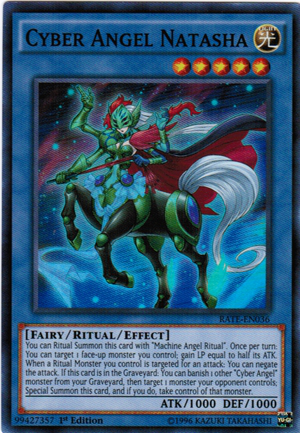

In [ ]:
img = kpi.load_img(data_dir+'/16914')  # this is a PIL image
img

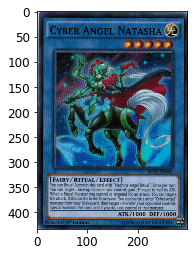

In [ ]:
x = kpi.img_to_array(img)  
plt.imshow(x/255, interpolation='nearest')
plt.show()

### Pré-traitements

In [ ]:
test = get_image_files(data_dir)
failed = verify_images(test)
failed

(#0) []

In [ ]:
splitfolders.ratio("/content/original/", output="pictures2", seed=1337, ratio=(.8, .2), group_prefix=None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 2 files [00:00, 10.91 files/s]
Copying files: 126 files [00:00, 547.75 files/s]
Copying files: 245 files [00:00, 792.54 files/s]
Copying files: 339 files [00:00, 841.94 files/s]
Copying files: 447 files [00:00, 920.16 files/s]
Copying files: 558 files [00:00, 981.46 files/s]
Copying files: 661 files [00:00, 977.70 files/s]
Copying files: 783 files [00:00, 1051.16 files/s]
Copying files: 891 files [00:00, 1057.93 files/s]
Copying files: 999 files [00:01, 1056.28 files/s]
Copying files: 1114 files [00:01, 1083.35 files/s]
Copying files: 1224 files [00:01, 890.34 files/s] 
Copying files: 1320 files [00:01, 598.31 files/s]
Copying files: 1397 files [00:01, 603.95 files/s]
Copying files: 1469 files [00:01, 588.09 files/s]
Copying files: 1540 files [00:02, 614.20 files/s]
Copying files: 1608 files [00:02, 615.08 files/s]
Copying files: 1674 files [00:02, 526.84 files/s]
Copying files: 1732 files [00:02, 399.31 files/s]
Copying files: 

### Training my Model

In [ ]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [ ]:
carte = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))